Q1.Background

Function to resize

In [24]:
import numpy as np
import cv2
# Load image
def resize(img,h1,w1):
    # img = cv2.imread('bomb.jpg') 
    # print(h,w)
    # Get input size
    h, w = img.shape[:2]

    # Desired output size
    out_h, out_w = h1, w1

    # Calculate scale    
    y_scale = out_h/h
    x_scale = out_w/w

    # Allocate output image
    resized = np.zeros((out_h, out_w, 3), dtype='uint8')

    for i in range(out_h):
        for j in range(out_w):
        
            # Map output pixel to input pixel
            x = int(j/x_scale)
            y = int(i/y_scale)
            
            # Bilinear interpolation 
            x1 = max(0, x-1)
            x2 = min(w-1, x+1)
            y1 = max(0, y-1) 
            y2 = min(h-1, y+1)
            
            A = img[y1, x1].astype(float)
            B = img[y1, x2].astype(float)
            C = img[y2, x1].astype(float)
            D = img[y2, x2].astype(float)
            
            wx = x_scale * (j/x_scale - x)
            wy = y_scale * (i/y_scale - y)
            
            output = (A*(1-wx) + B*wx)*(1-wy) + (C*(1-wx) + D*wx)*wy
            
            resized[i,j] = output.astype('uint8')
    return resized
    # cv2.imwrite('resized.jpg', resized)

In [16]:
import cv2
import numpy as np

def apply_border_padding(image, padding_size):
    border_color = image[0, 0].tolist()  # Convert color to a list
    padded_image = cv2.copyMakeBorder(image, padding_size, padding_size, padding_size, padding_size, cv2.BORDER_CONSTANT, value=border_color)
    return padded_image

# Load your image
input_image = cv2.imread('oppenheimer.png')

# Define the padding size
padding_size = 80  # Adjust this value as needed

# Apply border padding
padded_image = apply_border_padding(input_image, padding_size)

# Save the padded image
cv2.imwrite('padded_image.jpg', padded_image)



True

In [30]:
import cv2
import numpy as np

# Load images
def mixer(img1,img2):
    # img1 = cv2.imread('oppenheimer.png')
    # img2 = cv2.imread('atomicbomb.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    img1 = resize(img1, img2.shape[0], img2.shape[1])

    mask = img1[:,:,1] > 250
    img1=img1/5
    img1=img1.astype(int)


    img1[mask] = img2[mask]
    return img1



# cv2.imwrite('final1.png', img1)


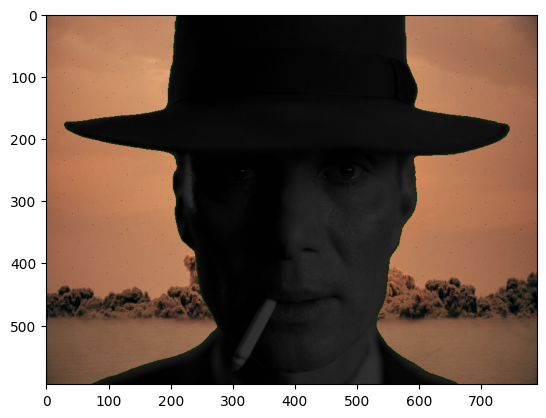

In [30]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(img1, cmap='hot')


plt.show()

right border extender

In [47]:
import cv2
import numpy as np

# Load your image
input_image = cv2.imread('oppenheimer.png')

# Define the width of the right border to be added
border_width = 700  # Adjust this value as needed

# Get the dimensions of the original image
height, width, channels = input_image.shape

# Create a new image with the extended right border
extended_image = np.zeros((height, width + border_width, channels), dtype=np.uint8)

# Copy the original image into the left part of the extended image
extended_image[:, :width] = input_image

# Copy the right border pixels to the extended right border
right_border = input_image[:, -border_width:, :]
extended_image[:, width:] = right_border
cv2.imwrite('extended_image.jpg', extended_image)


True

In [49]:
import matplotlib.pyplot as plt
oppie=cv2.imread('extended_image.jpg')
jean=cv2.imread('atomicbomb.jpg')
im=mixer(oppie,jean)


# fig, ax = plt.subplots()
# ax.imshow(im, cmap='hot')


# plt.show()

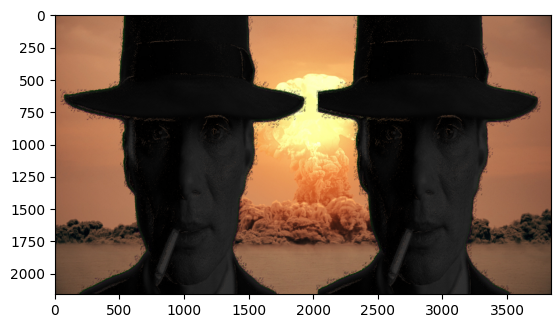

In [50]:
fig, ax = plt.subplots()
ax.imshow(im, cmap='hot')


plt.show()

In [54]:
import matplotlib.pyplot as plt
oppie=cv2.imread('extended_image.jpg')
jean=cv2.imread('hiroshima-damage.jpg')
pm=mixer(oppie,jean)

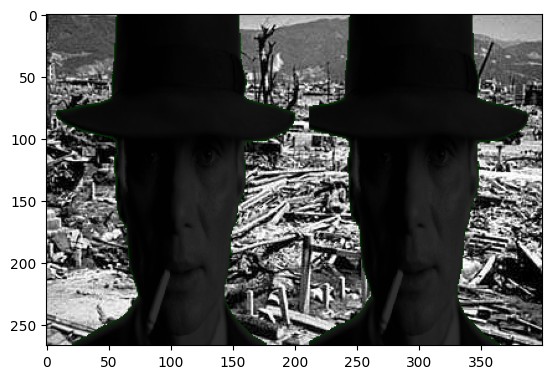

In [55]:
fig,ax=plt.subplots()
ax.imshow(pm)
plt.show()

Width: 720 pixels
Height: 480 pixels
Color depth: 24 bits per pixel
Size of one image = 720 x 480 x (24 / 8) = 691,200 bytes
2 GB = 2 * 1024 * 1024 * 1024 bytes (since 1 GB = 1024 MB, 1 MB = 1024 KB, 1 KB = 1024 bytes)
Number of images = (2 * 1024 * 1024 * 1024 bytes) / (691,200 bytes/image)
Number of images ≈ 2920.72
So, you can store approximately 2,920 images of size 720 x 480 in a 2 GB cloud storage space.

Q2

In [124]:
import numpy as np
def greyconvertor(img):
    # img = cv2.imread(img) 
    height, width, channels = img.shape

    # print(height,width,channels)
    gray = np.zeros((height, width), np.uint8)


    for i in range(height):
        for j in range(width):
        
            r, g, b = img[i, j]
            
            
            gray_val = 0.2989 * r + 0.5870 * g + 0.1140 * b

            
            gray[i, j] = gray_val
            # print(gray)

    return gray
    

In [32]:
import numpy as np
import cv2

def colorQuantize(img, k):

  # Split image into channels
  img = cv2.imread(img)
  # b,g,r = cv2.split(img)
  print(img.shape)
  # Quantize each channel  
  b = quantizeChannel(img, k)
 
  return b

def quantizeChannel(channel, k):
  
  # Quantize channel to k bits
  # k=8-k 
  # levels = 2**k
  k=2**k
  channel = np.array(channel)
  channel=channel&k
  # print(channel)
  # channel = (channel.astype(np.uint8) * (2**k - 1))//255
  return channel

In [33]:
for i in range(8):
    fi=colorQuantize('g2.jpg',i)

    cv2.imwrite('bitslice'+str(i)+'.jpg',fi)

(2160, 3840, 3)
(2160, 3840, 3)
(2160, 3840, 3)
(2160, 3840, 3)
(2160, 3840, 3)
(2160, 3840, 3)
(2160, 3840, 3)
(2160, 3840, 3)


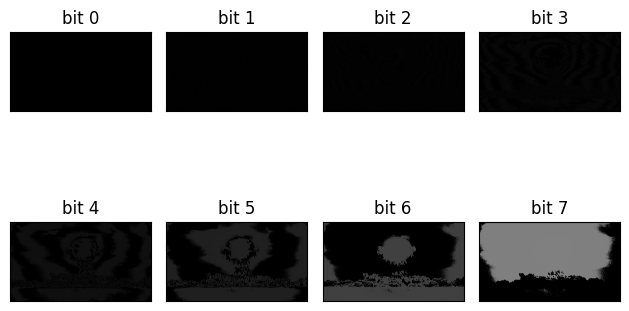

In [36]:
import matplotlib.pyplot as plt



img0 = cv2.imread('bitslice0.jpg') 
img1 = cv2.imread('bitslice1.jpg')
img2 = cv2.imread('bitslice2.jpg')  
img3 = cv2.imread('bitslice3.jpg')
img4 = cv2.imread('bitslice4.jpg')
img5 = cv2.imread('bitslice5.jpg')
img6 = cv2.imread('bitslice6.jpg')
img7 = cv2.imread('bitslice7.jpg')

fig, axs = plt.subplots(2, 4)

axs[0, 0].imshow(img0)
axs[0, 1].imshow(img1)
axs[0, 2].imshow(img2)
axs[0, 3].imshow(img3)
axs[1, 0].imshow(img4)
axs[1, 1].imshow(img5)
axs[1, 2].imshow(img6)
axs[1, 3].imshow(img7)


axs[0, 0].set_title('bit 0')  
axs[0, 1].set_title('bit 1')
axs[0, 2].set_title('bit 2')
axs[0, 3].set_title('bit 3') 
axs[1, 0].set_title('bit 4')  
axs[1, 1].set_title('bit 5')
axs[1, 2].set_title('bit 6')
axs[1, 3].set_title('bit 7') 

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

The higher order bit planes (MSB) contain the general structure/contours of the image. The lower order planes (LSB) contain more fine details.
So if we reconstruct image using only higher bit planes, we get a low frequency or blurred image preserving overall structure.
Using only lower planes gives us an image with sharper edges but loss of overall shape.
The intermediate planes contribute to middle frequency details of textures, transitions etc.
So each bit plane provides unique visual information about the image. Analyzing them gives insights into how bits encode image features.

Q3

In [1]:
import cv2
import numpy as np

def linContrastStretching(im, a, b):

  # Get minimum and maximum intensities
  min_val = np.min(im)
  max_val = np.max(im)
  
  # Perform contrast stretching
  out = im.copy()
  out = (b - a)/(max_val - min_val) * (im - min_val) + a
  out = np.clip(out, a, b)

  return out

In [2]:
# Load image
import matplotlib.pyplot as plt

def strech(n):
    img = cv2.imread('barbie_flat.png') 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Enhance contrast 
    enhanced = linContrastStretching(img, 25, n)
    enhanced=enhanced.astype(int)
    # Save output image
    # cv2.imwrite('enhanced.jpg', enhanced)
    fig,ax=plt.subplots()
    ax.imshow(enhanced,cmap='hot')

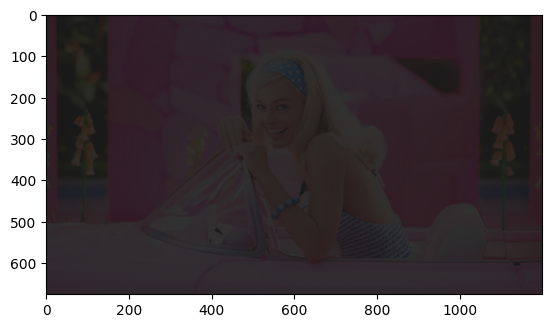

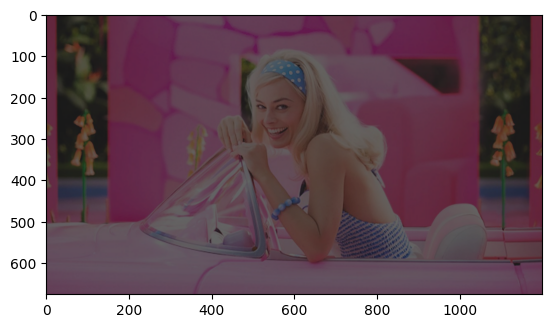

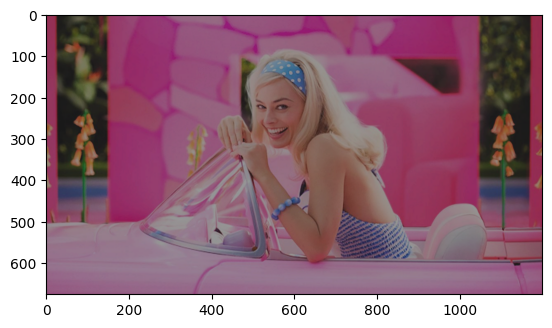

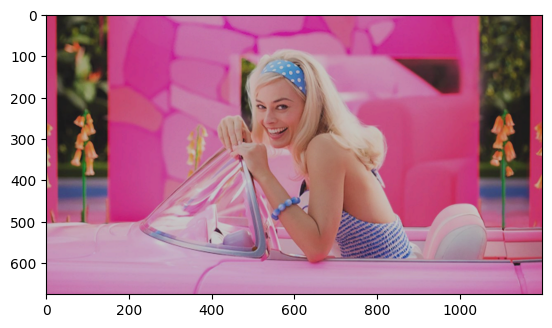

In [67]:
list=[50,100,150,200]
for i in list:
    strech(i)

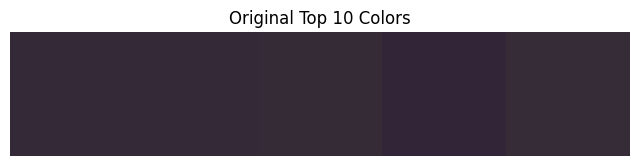

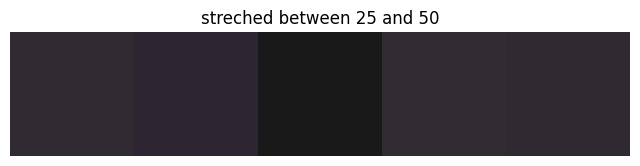

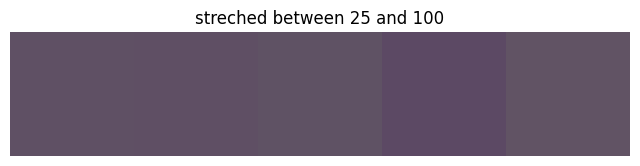

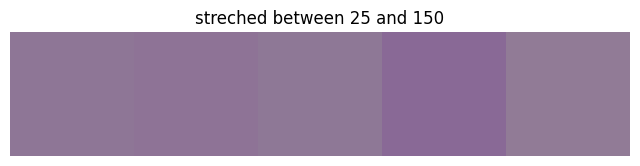

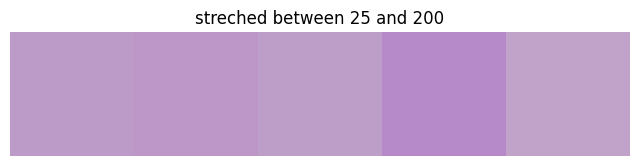

In [4]:

import matplotlib.pyplot as plt
list=[50,100,150,200]
# def colorbar():
img = cv2.imread('barbie_flat.png')

# Get top k colors
k = 5
colors, count = np.unique(img.reshape(-1,3), axis=0, return_counts=True)
top_k_colors = colors[np.argsort(count)[::-1][:k]]

# Plot original colorbar
plt.figure(figsize=(8,2))
plt.imshow([top_k_colors])
plt.title("Original Top 10 Colors")
plt.axis('off')

# Contrast stretching 
for i in list:
# strech(i)
    enhanced = linContrastStretching(img, 25, i)
    enhanced=enhanced.astype(int)
    # Get top k colors again
    colors, count = np.unique(enhanced.reshape(-1,3), axis=0, return_counts=True)
    top_k_colors = colors[np.argsort(count)[::-1][:k]]

    # Plot enhanced colorbar
    plt.figure(figsize=(8,2))
    plt.imshow([top_k_colors])
    plt.title("streched between"+" 25"+" and "+str(i))
    plt.axis('off')

    plt.show()



Q4

In [56]:
import cv2
import numpy as np

def histEqualization(img):

  # Get image histogram
  hist, bins = np.histogram(img.flatten(), 256, [0,256])
  
  # Calculate cumulative distribution function
  cdf = hist.cumsum()
  cdf_m = np.ma.masked_equal(cdf,0)

  # Normalize histogram
  cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
  cdf = np.ma.filled(cdf_m,0).astype('uint8')
  
  # Apply linear interpolation of cdf to find new pixel values
  img2 = cdf[img]

  return img2


In [57]:
img = cv2.imread('low.png')
eq_img = histEqualization(img)

cv2.imwrite('histo.jpg', eq_img)
# cv2.waitKey(0)

True

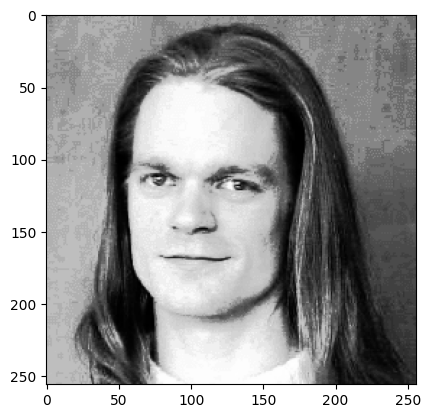

In [58]:
fig,ax=plt.subplots()
ax.imshow(eq_img)
plt.show()

Q5

In [ ]:
import cv2
import numpy as np
# Normalize image pixels to [0,1]
img=cv2.imread('stairs2.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img=greyconvertor(img)
m=img
img = img/255.0  
# Define segment thresholds
A = [(0.0,0.2),(0.2,0.3),(0.3,0.4),(0.4,1.0)]
B = [(0.0,0.0),(-1,0.7),(0.0,0.0),(1.0,-0.1)]
h,w=img.shape[:2]
result=np.zeros([h,w])
# Iterate through pixels
for i in range(h):
  for j in range(w):

    px = img[i,j] # normalized
    
    if px < A[0][1]:
      px_new = B[0][0]*px + B[0][1]
    elif px >= A[1][0] and px < A[1][1]:
      px_new = B[1][0]*px + B[1][1]  
    elif px >= A[2][0] and px < A[2][1]:
      px_new = B[2][0]*px + B[2][1]
    else:
      px_new = B[3][0]*px + B[3][1]
    
    
    # ...check other segments

    # Rescale output 
    px_new = px_new*255  
    px_new = np.clip(px_new, 0, 255)
    # print(px_new)
    result[i,j] = int(px_new)
    # print(res[i][j])
cv2.imwrite('stairs2conv.png',result)


In [ ]:

img=cv2.imread('iris1.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img=greyconvertor(img)
m=img
img = img/255.0  
# Define segment thresholds
A = [(0.0,0.2),(0.2,0.3),(0.3,0.4),(0.4,1.0)]
B = [(0.0,0.0),(-1,0.7),(0.0,0.0),(1.0,-0.1)]
h,w=img.shape[:2]
result=np.zeros([h,w])
# Iterate through pixels
for i in range(h):
  for j in range(w):

    px = img[i,j] # normalized
    
    if px < A[0][1]:
      px_new = B[0][0]*px + B[0][1]
    elif px >= A[1][0] and px < A[1][1]:
      px_new = B[1][0]*px + B[1][1]  
    elif px >= A[2][0] and px < A[2][1]:
      px_new = B[2][0]*px + B[2][1]
    else:
      px_new = B[3][0]*px + B[3][1]
    
    
    # ...check other segments

    # Rescale output 
    px_new = px_new*255  
    px_new = np.clip(px_new, 0, 255)
    # print(px_new)
    result[i,j] = int(px_new)
cv2.imwrite('piecewise.png',result)

In [112]:
result.shape

(536, 1012)

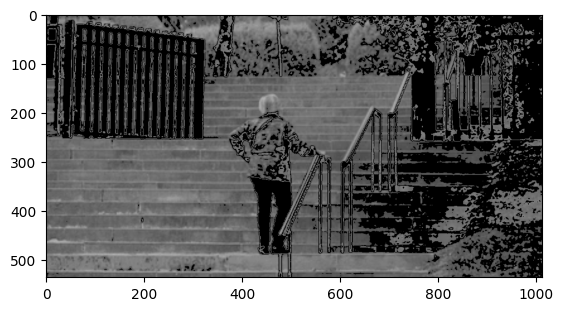

In [142]:
# print(result.shape)
fig,ax=plt.subplots()
result=cv2.imread('stairs2conv.png')
ax.imshow(result)
plt.show()

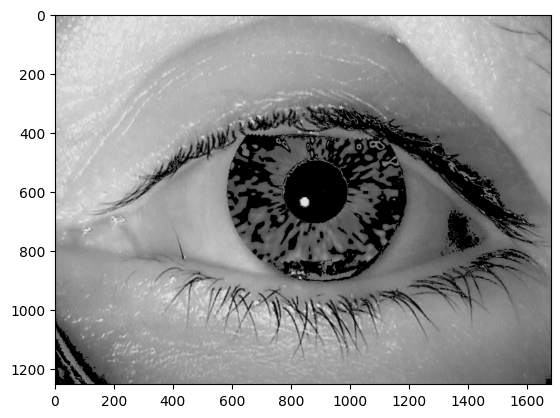

In [143]:
fig,ax=plt.subplots()
result=cv2.imread('piecewise.png')
ax.imshow(result)
plt.show()

In [113]:
a1=np.zeros(256)
# a2=np.zeros(256)
for i in range(536):
    for j in range(1012):
        # if(a1[m1[i][j]]!=m2[i][j] and m1[i][j]==168):
        #     print(a1[m1[i][j]],m2[i][j],i,j)
        a1[m[i][j]]=result[i][j]

In [114]:
a2=[i for i in range(256)]

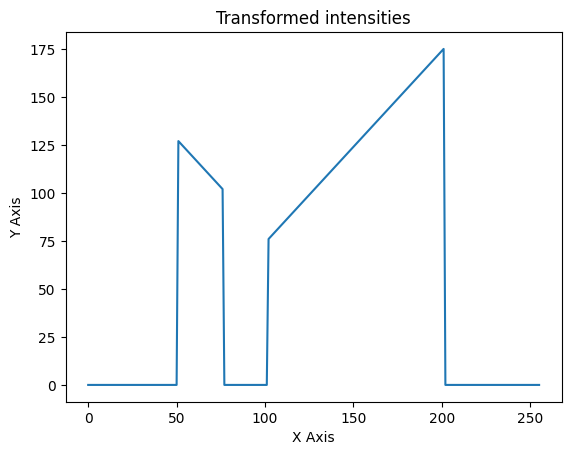

In [115]:
import matplotlib.pyplot as plt


# Plot line graph
plt.plot(a2, a1)

# Add labels  
plt.xlabel('X Axis')  
plt.ylabel('Y Axis')

# Add title
plt.title('Transformed intensities') 

# Show graph
plt.show()

Q6

In [116]:
import numpy as np

img = cv2.imread('micro.jpg') 
img1=cv2.imread('m2.jpg')
mi=np.zeros(256)
m1=np.zeros(256)


In [117]:
print(img.shape,img1.shape)

(1000, 1000, 3) (1000, 1000, 3)


In [120]:
m1=greyconvertor('micro.jpg')
m2=greyconvertor('transformed.png')


In [115]:
cv2.imwrite("gmicro.jpg",m1)
cv2.imwrite("gm2.jpg",m2)

True

In [114]:
print(m1.shape,m2.shape)

(1000, 1000) (1000, 1000)


In [121]:
a1=np.zeros(256)
# a2=np.zeros(256)
for i in range(1000):
    for j in range(1000):
        if(a1[m1[i][j]]!=m2[i][j] and m1[i][j]==168):
            print(a1[m1[i][j]],m2[i][j],i,j)
        a1[m1[i][j]]=m2[i][j]
        


0.0 173 0 0


In [122]:
a2=[i for i in range(256)]

In [ ]:
import cv2
import numpy as np
# Normalize image pixels to [0,1]
# def pwt(img):
# s=img[:-3]
img=cv2.imread('m1.png')

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img=greyconvertor(img)

A=[(0,132),(133,255)]
B=[(2,0),(-2,510)]

h,w=img.shape[:2]
result=np.zeros([h,w])
# Iterate through pixels
for i in range(h):
  for j in range(w):

    px = img[i,j] # normalized
    
    if px < A[0][1]:
      px_new = B[0][0]*px + B[0][1]
      print(px,px_new)
    elif px >= A[1][0] and px < A[1][1]:
      px_new = B[1][0]*px + B[1][1]  
      
    # px_new = px_new*255  
    px_new = np.clip(px_new, 0, 255)
    result[i,j] = int(px_new)
cv2.imwrite("pm.jpg",result)

      # return result

In [ ]:
img=cv2.imread('bomb.jpg')

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img=greyconvertor(img)

A=[(0,132),(133,255)]
B=[(2,0),(-2,510)]

h,w=img.shape[:2]
result=np.zeros([h,w])
# Iterate through pixels
for i in range(h):
  for j in range(w):

    px = img[i,j] # normalized
    
    if px < A[0][1]:
      px_new = B[0][0]*px + B[0][1]
      print(px,px_new)
    elif px >= A[1][0] and px < A[1][1]:
      px_new = B[1][0]*px + B[1][1]  
      
    # px_new = px_new*255  
    px_new = np.clip(px_new, 0, 255)
    result[i,j] = int(px_new)
cv2.imwrite("bt.jpg",result)

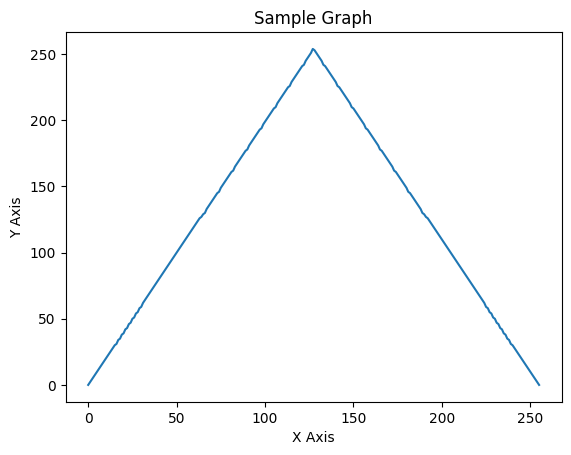

In [101]:
import matplotlib.pyplot as plt


# Plot line graph
plt.plot(a2, a1)

# Add labels  
plt.xlabel('X Axis')  
plt.ylabel('Y Axis')

# Add title
plt.title('Sample Graph') 

# Show graph
plt.show()

In [ ]:
img=cv2.imread('emily.png')

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img=greyconvertor(img)

A=[(0,132),(133,255)]
B=[(2,0),(-2,510)]

h,w=img.shape[:2]
result=np.zeros([h,w])
# Iterate through pixels
for i in range(h):
  for j in range(w):

    px = img[i,j] # normalized
    
    if px < A[0][1]:
      px_new = B[0][0]*px + B[0][1]
      print(px,px_new)
    elif px >= A[1][0] and px < A[1][1]:
      px_new = B[1][0]*px + B[1][1]  
      
    # px_new = px_new*255  
    px_new = np.clip(px_new, 0, 255)
    result[i,j] = int(px_new)
cv2.imwrite("et.jpg",result)

In [ ]:
img=cv2.imread('barbie_flat.png')

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img=greyconvertor(img)

A=[(0,132),(133,255)]
B=[(2,0),(-2,510)]

h,w=img.shape[:2]
result=np.zeros([h,w])
# Iterate through pixels
for i in range(h):
  for j in range(w):

    px = img[i,j] # normalized
    
    if px < A[0][1]:
      px_new = B[0][0]*px + B[0][1]
      print(px,px_new)
    elif px >= A[1][0] and px < A[1][1]:
      px_new = B[1][0]*px + B[1][1]  
      
    # px_new = px_new*255  
    px_new = np.clip(px_new, 0, 255)
    result[i,j] = int(px_new)
cv2.imwrite("bb.jpg",result)

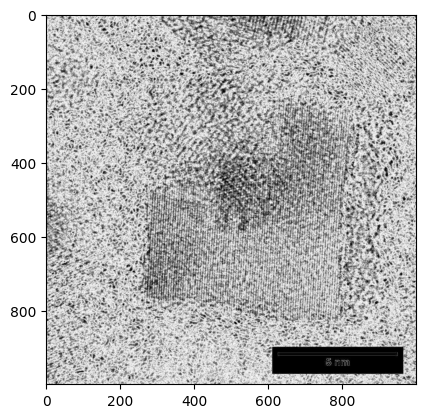

In [141]:
fig,ax=plt.subplots()
result=cv2.imread('pm.jpg')
ax.imshow(result)
plt.show()

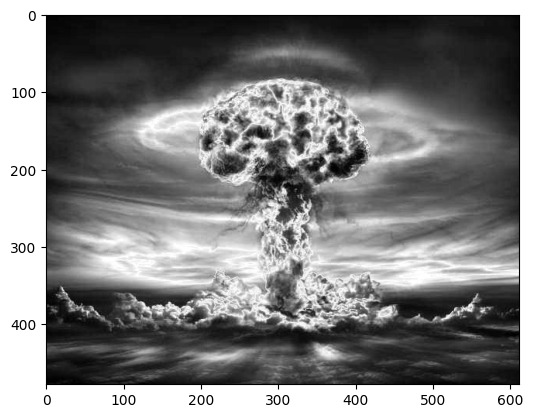

In [169]:
fig,ax=plt.subplots()
result=cv2.imread('bt.jpg')
ax.imshow(result)
plt.show()

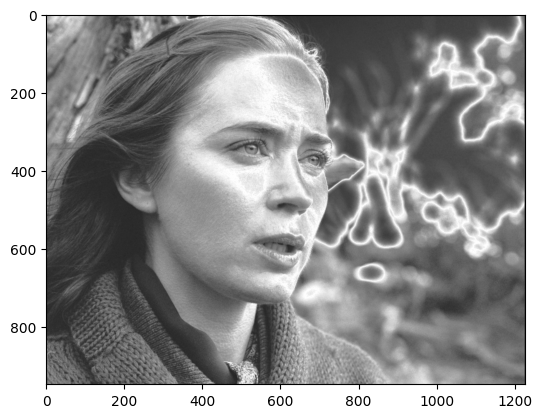

In [170]:
fig,ax=plt.subplots()
result=cv2.imread('et.jpg')
ax.imshow(result)
plt.show()

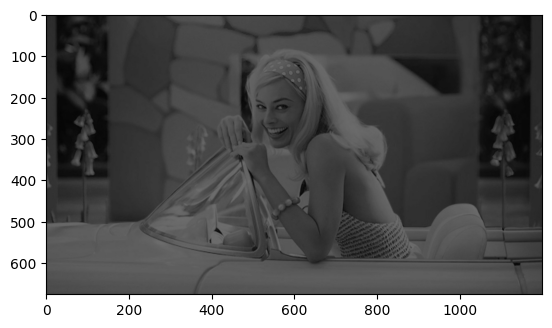

In [171]:
fig,ax=plt.subplots()
result=cv2.imread('bb.jpg')
ax.imshow(result)
plt.show()